# <font color=#BB44>Python Introduction using OSA Case Study:</font>
* # We will learn how to Mount Google Drive to access files in Google Drive
* # As an example we wil read and aggregate data from two csv files
#### - OSA_DB_UPM_Age_Gender.csv
#### - OSA_DB_UPM_Clinical.csv
</font>

---
---
## We will also introduce and use some of the most common Python packages:



## [NumPy is the fundamental package for scientific computing with Python](http://www.numpy.org/)
![Imagen Numpy](https://th.bing.com/th/id/OIP.SWV16sONAikzxOEE-So3XwHaC7?pid=Api&rs=1)

## [Matplotlib is a Python 2D plotting library](https://matplotlib.org/)
![Matplotlib Image](https://matplotlib.org/_static/logo2.png)

## [Python Data Analysis Library](https://pandas.pydata.org/)
![Pandas Image](https://pandas.pydata.org/pandas-docs/stable/_static/pandas.svg)

## [SciPy: open-source software for mathematics, science, and engineering](https://www.scipy.org/)
![Imagen SciPy](https://www.scipy.org/_static/logo.png)

## [scikit-learn: Machine Learning in Python](http://scikit-learn.org/stable/)
![Scikit-learn Image](http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)


---
# Your default working directory is /content:

Try with some linux commands

*   pwd prints the current working directory
*   ls  lists directory contents of files and directories
*   cd  change directory



In [1]:
pwd

'/content'

In [2]:
ls

sample_data/


---

# <font color=FF4455>Mount your Google Drive to access OSA Data</font>

* ## **NOTE**: we have TWO CSV Files !!!

* ## Run below two lines of code and get the authorization code by loggin into your Google account. Then, paste the authorization code



In [3]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive




* # explore your Google Drive



In [4]:
ls

drive/  sample_data/


In [5]:
ls /content/drive

MyDrive/


In [6]:
ls /content/drive/MyDrive/

 ALEXA/                           MODELS/
 ARCHITECTURES/                   MSTC_Keras_HAR_CNN_2018.ipynb
 AUDIO/                           MUSIC/
 BINL/                            NLP/
 birdclef_2021_images_small.zip   PRDL_MLLB/
 birdclef_2021_small/             REVER/
 BO/                              REVERBERADOS@
'Colab Notebooks'/                s2s.h5
 DATA/                            SED/
 decoder_graph.png                seq2seq_graph.png
 DGM/                             similar_words_2d_.png
'DGM (1)'/                        TFMs/
 EMOTION/                         TIMIT/
 encoder_graph.png                TTS_SPANISH/
'Getting started.pdf'             Twitter/
 LSTM_MIDI/                       UNSUPERVISED_OSA/
 McKinsey/                        UTILS/
 METADATA/                        VISUALIZATION/


* # Move to the directory where your OSA Excel file is located

In [12]:
cd /content/drive/MyDrive/PRDL_MLLB/OSA/DATA

/content/drive/MyDrive/PRDL_MLLB/OSA/DATA


In [14]:
pwd

'/content/drive/MyDrive/PRDL_MLLB/OSA/DATA'

In [13]:
ls

OSA_DB_UPM_Age_Gender.csv  OSA_DB_UPM_Clinical.csv


---

## Read the TWO csv files OSA into two different data frames using **PANDAS**

In [15]:
# Import pandas
import pandas as pd

# Read Clinical Data
OSA_Clinical_df = pd.read_csv("OSA_DB_UPM_Clinical.csv",sep=';',na_values=['-1'])


In [16]:
type(OSA_Clinical_df)

pandas.core.frame.DataFrame

In [18]:
OSA_Clinical_df.head(10)

,ID,IAH,Weight,Height,Cervical
0,1,71.0,82.0,168.0,NaN
1,2,29.6,119.0,174.0,48.0
2,3,56.0,NaN,NaN,43.0
3,4,19.7,78.0,168.0,42.0
4,5,9.0,80.0,173.0,40.0
5,6,2.0,109.0,190.0,42.0
6,7,34.0,86.0,169.0,42.0
7,8,60.0,145.0,172.0,44.0
8,9,22.0,72.0,165.0,42.0
9,10,11.0,80.0,180.0,38.0


In [19]:
# We drop columns with "no data"  NA

OSA_Clinical_df=OSA_Clinical_df.dropna()

OSA_Clinical_df.describe()

,ID,IAH,Weight,Height,Cervical
count,599.000000,599.000000,599.000000,599.000000,599.000000
mean,308.616027,20.147346,87.704508,171.168614,40.631886
std,176.682725,18.144753,18.412257,9.502857,3.969171
min,2.000000,0.000000,45.000000,144.000000,30.000000
25%,155.500000,6.400000,75.000000,165.000000,38.000000
50%,308.000000,14.300000,86.000000,171.000000,41.000000
75%,457.500000,30.000000,98.000000,178.000000,43.000000
max,617.000000,108.400000,165.000000,197.000000,53.000000


In [20]:
# Now Read Demographical Information

OSA_Demo_df = pd.read_csv("OSA_DB_UPM_Age_Gender.csv",na_values=['-1'])

OSA_Demo_df=OSA_Demo_df.dropna()

OSA_Demo_df.describe()

,ID,Gender,Age
count,614.000000,614.000000,614.000000
mean,309.630293,0.281759,49.469055
std,178.463348,0.450223,12.327168
min,1.000000,0.000000,20.000000
25%,154.250000,0.000000,40.000000
50%,310.500000,0.000000,49.000000
75%,463.750000,1.000000,59.000000
max,617.000000,1.000000,88.000000


In [21]:
OSA_Demo_df.head()

,ID,Gender,Age
0,1,0,39.0
1,2,0,56.0
2,3,0,46.0
3,4,0,39.0
4,5,0,32.0


## DATA AGREGATION

In [22]:
# JOIN OSA_Demo_df and OSA_Clinical_df
# see, for example:
# https://www.analyticsvidhya.com/blog/2020/02/joins-in-pandas-master-the-different-types-of-joins-in-python/

###### Learn why INNER??? join

OSA_df = pd.merge(OSA_Clinical_df, OSA_Demo_df, on='ID', how='inner')



In [23]:
OSA_df.head(5)

,ID,IAH,Weight,Height,Cervical,Gender,Age
0,2,29.6,119.0,174.0,48.0,0,56.0
1,4,19.7,78.0,168.0,42.0,0,39.0
2,5,9.0,80.0,173.0,40.0,0,32.0
3,6,2.0,109.0,190.0,42.0,0,32.0
4,7,34.0,86.0,169.0,42.0,0,39.0


In [24]:
OSA_df.describe()

,ID,IAH,Weight,Height,Cervical,Gender,Age
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,308.616027,20.147346,87.704508,171.168614,40.631886,0.285476,49.502504
std,176.682725,18.144753,18.412257,9.502857,3.969171,0.452018,12.349546
min,2.000000,0.000000,45.000000,144.000000,30.000000,0.000000,20.000000
25%,155.500000,6.400000,75.000000,165.000000,38.000000,0.000000,40.000000
50%,308.000000,14.300000,86.000000,171.000000,41.000000,0.000000,49.000000
75%,457.500000,30.000000,98.000000,178.000000,43.000000,1.000000,59.000000
max,617.000000,108.400000,165.000000,197.000000,53.000000,1.000000,88.000000


---

# Learn how to do **queries** using Pandas
## Remember considering SQL vs Pandas
## https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_sql.html

* ## <font color = red>¿How many males and females have IAH > 30?</font>

In [25]:
Result= OSA_df[OSA_df['IAH'] > 30].groupby('Gender')['IAH'].count()

print(Result)


Gender
0    117
1     25
Name: IAH, dtype: int64


In [26]:
Result= OSA_df.groupby('Gender')['IAH'].mean()

print(Result)

Gender
0    22.367196
1    14.591228
Name: IAH, dtype: float64


<font size= 5 color=red>----------------------------------------------------------------</font>




![Image Pandas Indexing](https://shanelynnwebsite-mid9n9g1q9y8tt.netdna-ssl.com/wp-content/uploads/2016/10/Pandas-selections-and-indexing-768x549.png)
[Pandas DataFrame Indexing](https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/)

In [27]:
OSA_df.iloc[0:4,]

,ID,IAH,Weight,Height,Cervical,Gender,Age
0,2,29.6,119.0,174.0,48.0,0,56.0
1,4,19.7,78.0,168.0,42.0,0,39.0
2,5,9.0,80.0,173.0,40.0,0,32.0
3,6,2.0,109.0,190.0,42.0,0,32.0


In [28]:
OSA_df['ID'] = OSA_df['ID'].astype('str')

In [29]:
OSA_df = OSA_df.set_index('ID')

In [30]:
OSA_df.head(5)

,IAH,Weight,Height,Cervical,Gender,Age
ID,,,,,,
2,29.6,119.0,174.0,48.0,0,56.0
4,19.7,78.0,168.0,42.0,0,39.0
5,9.0,80.0,173.0,40.0,0,32.0
6,2.0,109.0,190.0,42.0,0,32.0
7,34.0,86.0,169.0,42.0,0,39.0


In [31]:
OSA_df.loc[['5','7']]

,IAH,Weight,Height,Cervical,Gender,Age
ID,,,,,,
5,9.0,80.0,173.0,40.0,0,32.0
7,34.0,86.0,169.0,42.0,0,39.0



---
---
# Now we can do some Exploratory Data Analysis
* ## we will introduce Matplotlib (a very common Python plotting library)




## [Matplotlib is a Python 2D plotting library](https://matplotlib.org/)
![Matplotlib Image](https://matplotlib.org/_static/logo2.png)

* ## Remmember that scatter plots are very usefull for EDA in Regression
* ## Review PRDL Chapter 2 concepts

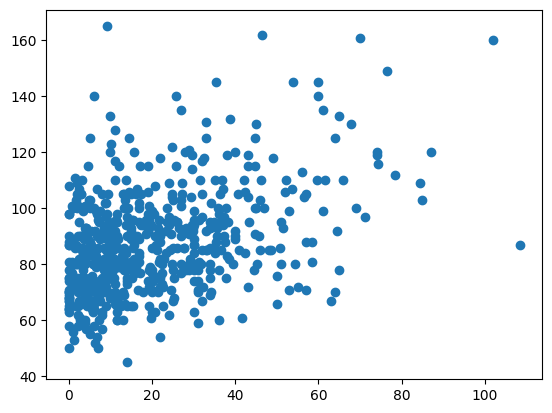

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(OSA_df['IAH'],OSA_df['Weight'])

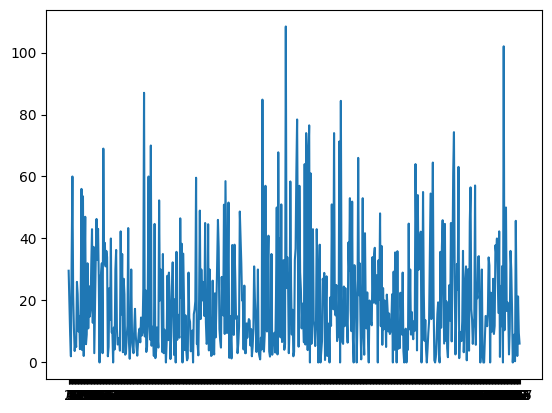

In [33]:
plt.plot(OSA_df['IAH'])

<Axes: xlabel='ID'>

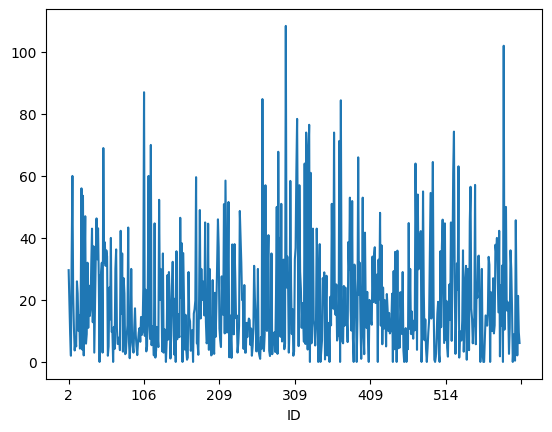

In [34]:
OSA_df['IAH'].plot()


<Axes: >

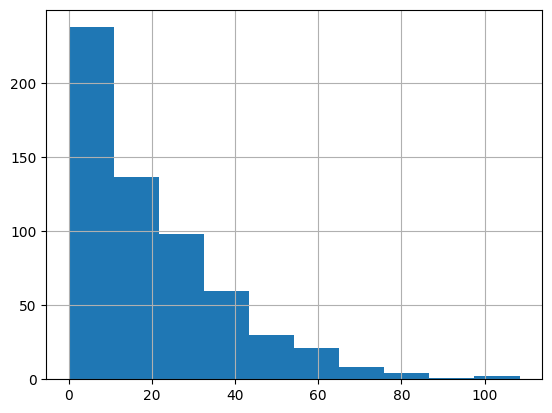

In [35]:
OSA_df['IAH'].hist()

# .describe()   .mean()

In [36]:
# import the scatter_matrix functionality
from pandas.plotting import scatter_matrix

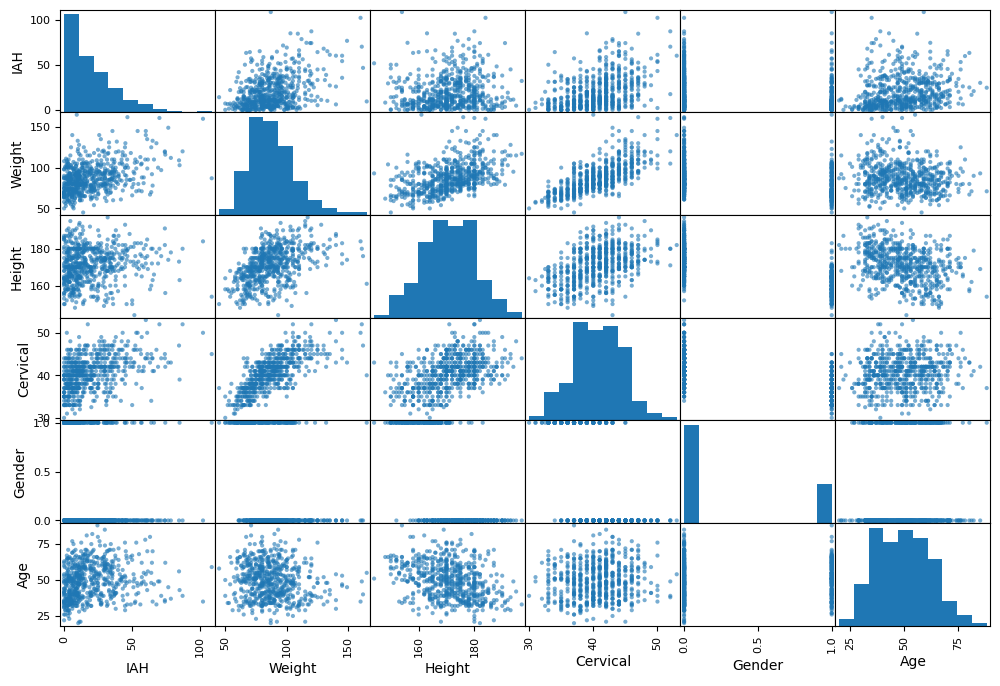

In [37]:
axes = scatter_matrix(OSA_df, alpha=0.6, figsize=(12, 8), diagonal='hist')

# diagonal = 'kde' Kernel Density Estimation

## As part of EDA for Regression you can also explore correlation between variables

## You can use [NumPy: the fundamental package for scientific computing with Python](http://www.numpy.org/)
![Imagen Numpy](https://th.bing.com/th/id/OIP.SWV16sONAikzxOEE-So3XwHaC7?pid=Api&rs=1)


In [38]:
import numpy as np

np.corrcoef(OSA_df.Weight, OSA_df.IAH)

array([[1.        , 0.40731424],
       [0.40731424, 1.        ]])

## You can also know about [SciPy: open-source software for mathematics, science, and engineering](https://www.scipy.org/)
![Imagen SciPy](https://www.scipy.org/_static/logo.png)


In [39]:
from scipy.stats import spearmanr

coef, p = spearmanr(OSA_df.Cervical, OSA_df.IAH)

print('Spearman cor coef: ', coef, ' p-value: ',p)

Spearman cor coef:  0.43523217297017175  p-value:  4.4304275249052375e-29


* ## You can also plot a correlation matrix (in this case using pandas corr function on the OSA_df

In [40]:
corr = OSA_df.corr()

corr.style.background_gradient(cmap='coolwarm')

,IAH,Weight,Height,Cervical,Gender,Age
IAH,1.000000,0.407314,0.104435,0.428931,-0.193713,0.163585
Weight,0.407314,1.000000,0.463731,0.721886,-0.333230,-0.133738
Height,0.104435,0.463731,1.000000,0.459095,-0.676934,-0.326519
Cervical,0.428931,0.721886,0.459095,1.000000,-0.606353,0.089495
Gender,-0.193713,-0.333230,-0.676934,-0.606353,1.000000,0.090490
Age,0.163585,-0.133738,-0.326519,0.089495,0.090490,1.000000


# Remember: correlation measures ONLY linear dependencies

In [41]:
x = np.random.uniform(-1,1,10000)

In [42]:
y= x**2

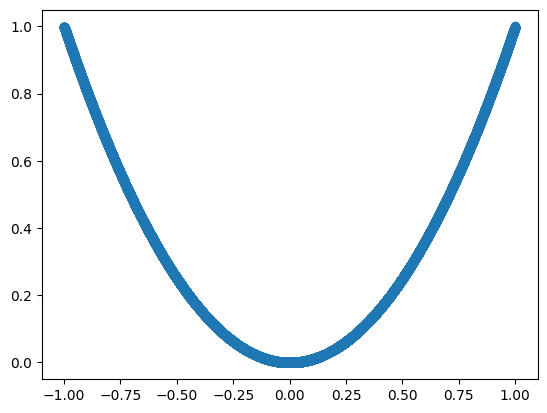

In [43]:
plt.scatter(x,y)

In [44]:
spearmanr(x, y)

SignificanceResult(statistic=0.005843360662433608, pvalue=0.559040012858796)

---
---

# Now we introduce Scikit-Learn for fitting linear regression models
* # Review the concepts in PRDL Chapter 3



## [scikit-learn: Machine Learning in Python](http://scikit-learn.org/stable/)
![Scikit-learn Image](http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)

## Python ML <font color='blue'>sklearn</font> for Multiple Linear Regression

In [45]:
columns = OSA_df.columns.tolist()

In [46]:
type(columns)

list

In [47]:
columns

['IAH', 'Weight', 'Height', 'Cervical', 'Gender', 'Age']

In [48]:
for c in columns:
  if c not in ["IAH","Gender"]:
    print(c)

Weight
Height
Cervical
Age


In [49]:
columns = [c for c in columns if c not in ["IAH","Gender"]]

In [50]:
columns

['Weight', 'Height', 'Cervical', 'Age']

In [51]:

### Picking predictor columns

# Get all the columns from the dataframe.
columns = OSA_df.columns.tolist()

# Filter the columns to remove ones we don't want.
columns = [c for c in columns if c not in ["IAH","Gender"]]

# Store the variable we'll be predicting on.
target = "IAH"

print('Predictors: ',columns)

Predictors:  ['Weight', 'Height', 'Cervical', 'Age']


In [52]:
# Splitting into train and test sets

# Generate the training set.  Set random_state to be able to replicate results.
train = OSA_df.sample(frac=0.8, random_state=1)


# Select anything not in the training set and put it in the testing set.
test = OSA_df.loc[~OSA_df.index.isin(train.index)]

# Print the shapes of both sets.
print(train.shape)
print(test.shape)

(479, 6)
(120, 6)


## TRAIN:

In [53]:
# Fitting a linear regression

# Import the linear models.
from sklearn import linear_model

# Initialize the model class.

model= linear_model.LinearRegression()

#model= linear_model.Ridge(alpha = 0.5)
# Fit the model to the training data.
Trained_model=model.fit(train[columns], train[target])

In [54]:
type(train)

pandas.core.frame.DataFrame

## Test

In [55]:
### Predicting Error

# Import the scikit-learn function to compute error.
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Generate our predictions for the test set.
predictions = model.predict(test[columns])

# Compute error between our test predictions and the actual values.
MSE=mean_squared_error(predictions, test[target])

MAE=mean_absolute_error(predictions, test[target])

print('Mean squared Error: ', MSE, ' Mean Absolute Error: ', MAE)

Mean squared Error:  323.88180208070895  Mean Absolute Error:  13.303993149090866


In [56]:
# Explained variance score:
from sklearn.metrics import r2_score

print('Variance score: %.2f' % r2_score(test[target], predictions))

Variance score: 0.14


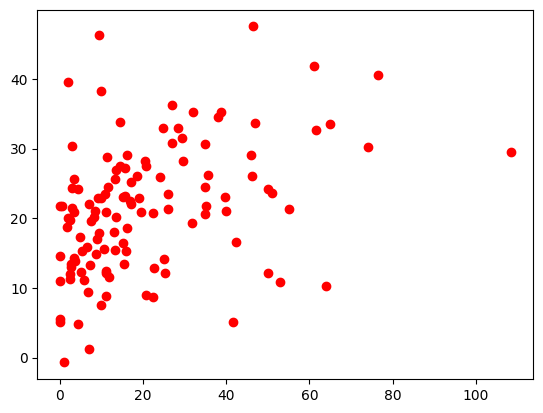

In [57]:
# Plot outputs
plt.scatter(test[target], predictions,  color='red')

plt.show()

## [NumPy is the fundamental package for scientific computing with Python](http://www.numpy.org/)
![Imagen Numpy](https://th.bing.com/th/id/OIP.SWV16sONAikzxOEE-So3XwHaC7?pid=Api&rs=1)


# *NOTE*: we NOT used numerical Matrices, we have used Pandas Dataframes
* # BUT we can used matrices and vectors using numpy

In [58]:
import numpy as np

X = np.array(OSA_df[columns])


In [59]:
OSA_df.shape

(599, 6)

In [60]:
OSA_df[0:4]

,IAH,Weight,Height,Cervical,Gender,Age
ID,,,,,,
2,29.6,119.0,174.0,48.0,0,56.0
4,19.7,78.0,168.0,42.0,0,39.0
5,9.0,80.0,173.0,40.0,0,32.0
6,2.0,109.0,190.0,42.0,0,32.0


In [62]:
X.shape

(599, 4)

In [61]:
X[0:4]

array([[119., 174.,  48.,  56.],
       [ 78., 168.,  42.,  39.],
       [ 80., 173.,  40.,  32.],
       [109., 190.,  42.,  32.]])

In [63]:
X[0,2:4]

array([48., 56.])

In [64]:
y = np.array(OSA_df['IAH'])

In [65]:
y[0:4]

array([29.6, 19.7,  9. ,  2. ])

In [66]:
y.shape

(599,)

* ## Train and test data splitting

In [67]:
from sklearn.model_selection import train_test_split

## Example: Train 80% and Test 20%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of both sets.
print(train.shape)
print(test.shape)

(479, 6)
(120, 6)


In [68]:
type(X_train)

numpy.ndarray

In [69]:
# Fitting a linear regression

# Import the linear models.
from sklearn import linear_model

# Initialize the model class.

model= linear_model.LinearRegression()

#model= linear_model.Ridge(alpha = 0.5)
# Fit the model to the training data.
Trained_model=model.fit(X_train, y_train)




## Test

In [70]:
### Predicting Error

# Import the scikit-learn function to compute error.
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Generate our predictions for the test set.
predictions = model.predict(X_test)

# Compute error between our test predictions and the actual values.
MSE=mean_squared_error(predictions, y_test)

MAE=mean_absolute_error(predictions, y_test)

print('Mean squared Error: ', MSE, ' Mean Absolute Error: ', MAE)

Mean squared Error:  220.30116442398855  Mean Absolute Error:  11.062461630241364


## Try improve using "feature" engineering ...  BMI, ....  (log(AHI))